![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Data Driven Business - Final Project - Modeling

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read in the selected_features.csv file
raw = pd.read_csv('selected_features.csv')
df = raw.copy()


In [3]:
df

,no_of_children,no_of_week_nights,arrival_date,avg_price_per_room,booking_status
0,0.0,2.0,2.0,65.00,0.0
1,0.0,3.0,6.0,106.68,0.0
2,0.0,1.0,28.0,60.00,1.0
3,0.0,2.0,20.0,100.00,1.0
4,0.0,1.0,11.0,94.50,1.0
...,...,...,...,...,...
35725,0.0,6.0,3.0,167.80,0.0
35726,0.0,3.0,17.0,90.95,1.0
35727,0.0,6.0,1.0,98.39,0.0
35728,0.0,3.0,21.0,94.50,1.0


/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

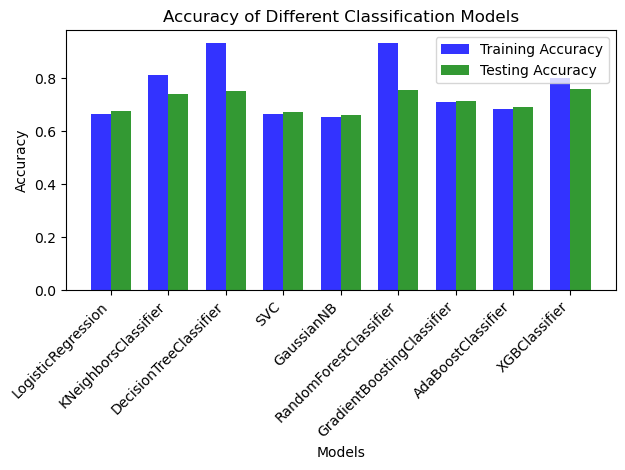

In [4]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# load dataset
data = df

# separate the features and target variables
X = data.drop("booking_status", axis=1)
y = data["booking_status"]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a list of 10 different classification models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    GaussianNB(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    
]

# create empty lists to store the accuracy scores
train_accuracy_scores = []
test_accuracy_scores = []
model_names = []

# loop through each model and train it on the training data
for model in models:
    # fit the model on the training data
    model.fit(X_train, y_train)

    # predict the target variable on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # calculate the accuracy score on the training and testing data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # append the accuracy score and model name to the lists
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)
    model_names.append(type(model).__name__)

# create a bar chart of the accuracy scores
fig, ax = plt.subplots()
x_pos = np.arange(len(model_names))
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(x_pos, train_accuracy_scores, bar_width,
                alpha=opacity, color='b',
                label='Training Accuracy')

rects2 = ax.bar(x_pos + bar_width, test_accuracy_scores, bar_width,
                alpha=opacity, color='g',
                label='Testing Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Different Classification Models')
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()



In [5]:
# Create a dataframe of the accuracy scores
accuracy_df = pd.DataFrame({'Model': model_names, 'Training Accuracy': train_accuracy_scores, 'Testing Accuracy': test_accuracy_scores})
accuracy_df

,Model,Training Accuracy,Testing Accuracy
0,LogisticRegression,0.666107,0.675716
1,KNeighborsClassifier,0.812363,0.741300
2,DecisionTreeClassifier,0.935069,0.752402
3,SVC,0.665467,0.672357
4,GaussianNB,0.656071,0.662095
5,RandomForestClassifier,0.935029,0.757813
6,GradientBoostingClassifier,0.712287,0.713033
7,AdaBoostClassifier,0.685658,0.691203
8,XGBClassifier,0.800128,0.758560


In [8]:
# Create a column with the difference between the training and testing accuracy
accuracy_df['Difference'] = accuracy_df['Training Accuracy'] - accuracy_df['Testing Accuracy']
# Sort the dataframe by the difference between the training and testing accuracy
accuracy_df.sort_values(by='Difference', ascending=False)

,Model,Training Accuracy,Testing Accuracy,Difference
2,DecisionTreeClassifier,0.935069,0.752402,0.182666
5,RandomForestClassifier,0.935029,0.757813,0.177215
1,KNeighborsClassifier,0.812363,0.741300,0.071062
8,XGBClassifier,0.800128,0.758560,0.041568
6,GradientBoostingClassifier,0.712287,0.713033,-0.000746
7,AdaBoostClassifier,0.685658,0.691203,-0.005544
4,GaussianNB,0.656071,0.662095,-0.006024
3,SVC,0.665467,0.672357,-0.006890
0,LogisticRegression,0.666107,0.675716,-0.009609


Voting Ensemble training accuracy: 0.6696753428491464
Voting Ensemble testing accuracy: 0.6710047579065211
              precision    recall  f1-score   support

         0.0       0.68      0.98      0.80      4786
         1.0       0.52      0.05      0.09      2360

    accuracy                           0.67      7146
   macro avg       0.60      0.51      0.44      7146
weighted avg       0.62      0.67      0.56      7146



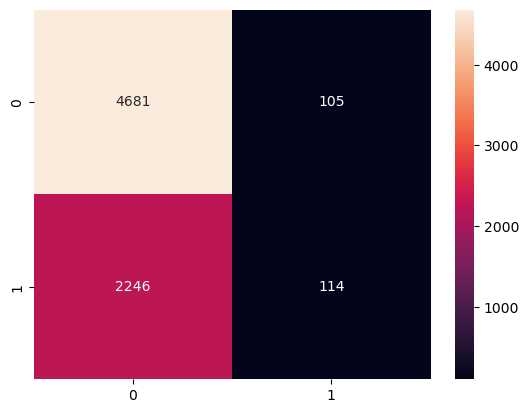

In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the models
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

models = [GradientBoostingClassifier(), 
          AdaBoostClassifier(), 
          GaussianNB(), 
          SVC(probability=True), 
          LogisticRegression()]

# load dataset
data = df

# separate the features and target variables
X = data.drop("booking_status", axis=1)
y = data["booking_status"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the voting classifier with the models and soft voting
voting_clf = VotingClassifier(estimators=[('gb', models[0]), 
                                          ('ada', models[1]), 
                                          ('gnb', models[2]), 
                                          ('svc', models[3]), 
                                          ('lr', models[4])], 
                              voting='soft')

# Fit the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Predict on training set 
y_pred_train = voting_clf.predict(X_train)
# Predict on the testing data
y_pred_test = voting_clf.predict(X_test)

# Evaluate the accuracy of the voting classifier on training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Voting Ensemble training accuracy: {accuracy_train}")
# Evaluate the accuracy of the voting classifier on testing data
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Voting Ensemble testing accuracy: {accuracy_test}")

# Output classification metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()










In [33]:
# Append the probability of the target variable to the dataframe
df['probability'] = voting_clf.predict_proba(X)[:, 1]


KeyboardInterrupt: 

In [36]:
# Appenn the y to the dataframe
df["booking_status"] = data["booking_status"]

In [38]:
# Sort by probability
df.sort_values(by='probability', ascending=False, inplace=True)

In [39]:
df

,no_of_children,no_of_week_nights,arrival_date,avg_price_per_room,booking_status,probability,y
16947,2.0,10.0,18.0,236.14,1.0,0.708352,1.0
17690,0.0,15.0,13.0,130.00,1.0,0.704399,1.0
26040,2.0,10.0,5.0,220.00,1.0,0.704358,1.0
32524,0.0,17.0,19.0,170.00,1.0,0.701700,1.0
19245,0.0,17.0,4.0,90.95,1.0,0.697351,1.0
...,...,...,...,...,...,...,...
19366,0.0,1.0,12.0,2.00,0.0,0.227119,0.0
4947,0.0,1.0,2.0,6.00,0.0,0.226123,0.0
8978,0.0,1.0,2.0,6.00,0.0,0.226123,0.0
8834,0.0,1.0,2.0,2.00,0.0,0.224326,0.0
